# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 8 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [34]:
### BEGIN YOUR CODE

Student_ID = 4

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [35]:
datasets = [('Combined Cycle Power Plant','https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant'), ('Beijing PM2.5','https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data'), ('Airfoil Self-Noise','https://archive.ics.uci.edu/dataset/291/airfoil+self+noise'), ('Energy Efficiency','https://archive.ics.uci.edu/dataset/242/energy+efficiency'), ('Bike Sharing','https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset'), ('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Bike Sharing' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [23]:
### BEGIN YOUR CODE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [36]:
### BEGIN YOUR CODE

# !wget PLACE_DATASET_URL_HERE

# !unzip ...
# !tar ...
# !gunzip ...

# dataset = pd.read_csv
# Скачиваем архив с датасетом (если ещё не скачан)
if not os.path.exists('Bike-Sharing-Dataset.zip'):
    !wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip -O Bike-Sharing-Dataset.zip

# Разархивируем (если ещё не разархивировано)
if not os.path.exists('hour.csv') or not os.path.exists('day.csv'):
    !unzip -q Bike-Sharing-Dataset.zip

# Загружаем оба датасета
dataset_hour = pd.read_csv('hour.csv')
dataset_day = pd.read_csv('day.csv')

# Проверяем первые строки каждого
print("Hourly data sample:")
print(dataset_hour.head())

print("\nDaily data sample:")
print(dataset_day.head())

dataset = dataset_day
### END YOUR CODE

Hourly data sample:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Daily data sample:
   instant      dteday  season  yr  mnth  holiday  weekday 

####  3. Посмотреть на общую картину (0.5 балла)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [37]:
### BEGIN YOUR CODE

#dataset.describe()
# Размер датасета в Мб (приблизительно)
file_size_mb = os.path.getsize('day.csv') / (1024 * 1024)

# Количество записей (объектов)
num_records = dataset.shape[0]

# Количество признаков (фич)
num_features = dataset.shape[1]

# Категориальные признаки (на основе документации и анализа уникальных значений)
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Проверка пропущенных значений
missing_values = dataset.isnull().sum().sum()

# Целевой столбец (target) и его тип
target_column = 'cnt'
target_dtype = dataset[target_column].dtype

# Основные статистические данные
description = dataset.describe(include='all')

# Вывод результатов
print(f"1. Размер датасета: {file_size_mb:.3f} Мб")
print(f"2. Количество записей: {num_records}")
print(f"3. Количество признаков: {num_features}")
print(f"4. Категориальные признаки: {categorical_features}")
print(f"5. Пропущенные значения (всего): {missing_values}")
print(f"6. Целевой столбец: '{target_column}', тип данных: {target_dtype}")
print("\n8. Основные статистические данные:")
print(description)

### END YOUR CODE

1. Размер датасета: 0.055 Мб
2. Количество записей: 731
3. Количество признаков: 16
4. Категориальные признаки: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
5. Пропущенные значения (всего): 0
6. Целевой столбец: 'cnt', тип данных: int64

8. Основные статистические данные:
           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2012-12-31         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000 

**Описание задачи и исходных данных**
<!-- **Здесь должен быть ваш текст**Размер датасета составляет 100500 килобайт, что соответствует 100,5 мегабайтам. В датасете содержится описание ... -->
Размер датасета составляет примерно 56 килобайт, что соответствует 0,055 мегабайтам. В датасете содержатся данные по дням по прокату велосипедов. Всего в нем 731 запись и 16 признаков, среди них категориальные 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', то есть сезон, год, месяц, выходной, день недели, будний день, погода. Пропущенных данных не найдено. Целевой столбец 'cnt' — это количество арендованных велосипедов в день, на основе представленных данных модель может прогнозировать количество арендованных велосипедов в определенный день. Так как значение данного столбца является числовым, то задача машинного обучения — регрессия.

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками, постройте корреляционную матрицу. Некоторые из признаков могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

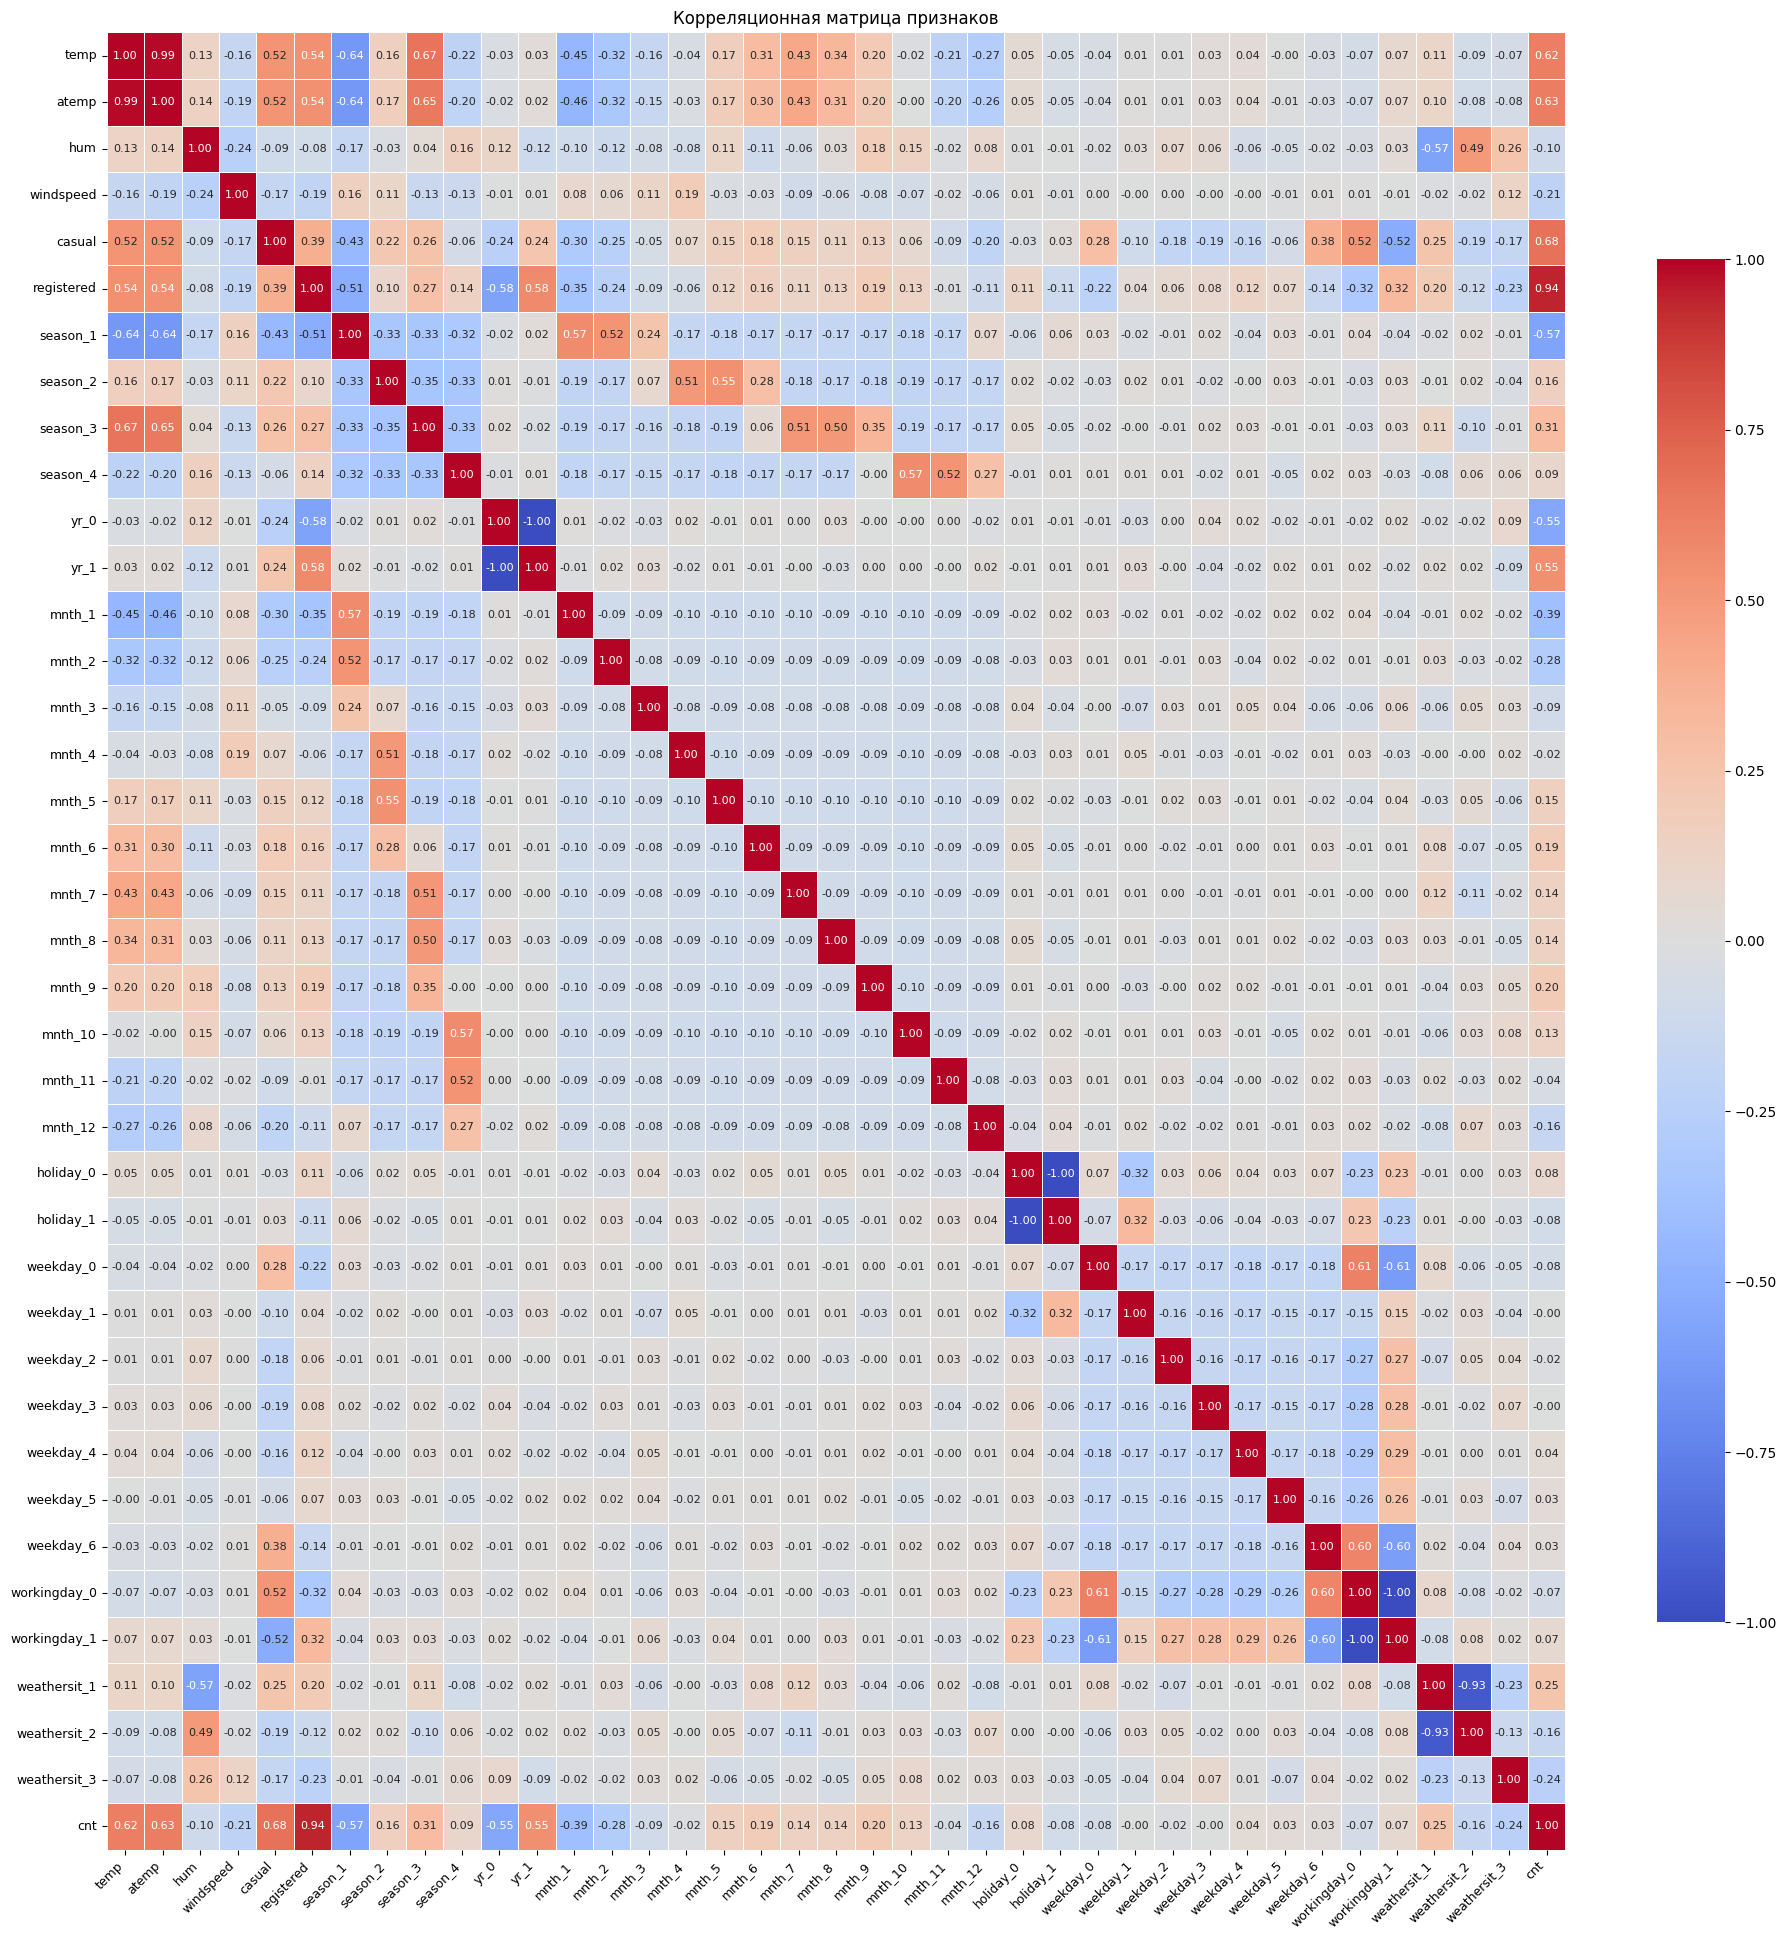

In [38]:
### BEGIN YOUR CODE

# рекомендуется разбить выборку на обучающую и тестовую, например, с помощью StratifiedShuffleSplit из sklearn.model_selection

# при необходимости добавьте дополнительные ячейки с кодом, чтобы разбить код на смысловые блоки и повысить его читабельность

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Предполагается, что dataset - ваш DataFrame с дневными данными Bike Sharing

target_column = 'cnt'

# Определяем категориальные и числовые признаки
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = [col for col in dataset.columns if col not in categorical_features + ['instant', 'dteday', target_column]]

X = dataset.drop(columns=[target_column])
y = dataset[target_column]

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Пайплайн для числовых признаков: заполнение пропусков и масштабирование
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Пайплайн для категориальных признаков: заполнение пропусков и one-hot кодирование
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Объединяем преобразования
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Обучаем трансформер на тренировочных данных
preprocessor.fit(X_train)

# Преобразуем тренировочные данные
# Применяем трансформер к обучающей и тестовой выборкам
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Получаем имена признаков после one-hot кодирования
encoded_cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features = numerical_features + list(encoded_cat_features)

# Преобразуем обратно в DataFrame для удобства анализа
X_train_df = pd.DataFrame(X_train_processed, columns=all_features)

# Добавляем целевой столбец
X_train_df[target_column] = y_train.reset_index(drop=True)

# Вычисляем корреляционную матрицу
corr_matrix = X_train_df.corr()

# Автоматическая настройка размера графика в зависимости от числа признаков
num_features = corr_matrix.shape[0]
plt.figure(figsize=(max(8, num_features * 0.5), max(6, num_features * 0.5)))

# Строим тепловую карту корреляций
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=False,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 8}
)

# Настраиваем подписи осей
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)

plt.title('Корреляционная матрица признаков', fontsize=12)
plt.tight_layout()
plt.show()

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [69]:
# Внимание: нельзя использовать библиотечный код для реализации линейной регрессии, напишите свой!
# Не забудьте поменять значения self.attribute = 0 на более подходящие или (лучше) задать их перед началом обучения

class LinearRegressionModel:
    """
    Перечень действий, которые можно выполнить с моделью
    """

    def __init__ (self):
        """
        Инициализация модели
        """
        self.theta = None # вектор параметров модели
        self.alpha = 0.25 # скорость обучения
        self.cost  = 0    # значение функционала качества обученной модели (значение функции стоимости)

    def compute_cost(self, X, y, theta):
        """
        Вычисление функции стоимости (эмпирический риск)
        Q(θ) = (1/(2l)) * sum((Xθ - y)^2)
        """
        m = len(y)
        predictions = X.dot(theta)
        errors = predictions - y
        cost = (1/(2*m)) * np.dot(errors.T, errors)
        return cost

    def gradient_descent(self, X_train, y_train, theta, alpha, iters):
        """
        Реализация градиентного спуска
        Входные данные:
        alpha: скорость обучения
        iters: количество итераций

        Выходные данные:
        theta: обновлённое значение вектора параметров
        cost: итоговое значение функции стоимости
        """

        # поместите сюда ваш код
        """
        Реализация градиентного спуска по формулам из лекции
        θ_j := θ_j - alpha * (1/l) * sum_i (g(x_i, θ) - y_i) * x_{i,j}
        """
        m = len(y_train)
        for _ in range(iters):
            predictions = X_train.dot(theta)            # g(x_i, theta)
            errors = predictions - y_train              # ошибки
            gradient = (1/m) * X_train.T.dot(errors)   # градиент по всем параметрам одновременно
            theta = theta - alpha * gradient            # обновление параметров
        self.cost = self.compute_cost(X_train, y_train, theta)
        self.theta = theta;
        return self.theta, self.cost

    def fit_with_GD(self, X_train, y_train, iters=200):
        """
        Обучение модели методом градиентного спуска
        Добавляем столбец x0=1 (фиктивный признак).
        """
        # поместите сюда ваш код для инициализации алгоритма подбора параметров методом градиентного спуска
        l, n = X_train.shape
        X_b = np.hstack([np.ones((l, 1)), X_train])  # добавляем x0=1 столбец фиктивных единиц
        self.theta = np.zeros(n + 1)  # инициализация θ нулями

        self.theta, self.cost = self.gradient_descent(X_b, y_train, self.theta, self.alpha, iters)
        return self.cost

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение с помощью решения системы нормальных уравнений (МНК)
        """
        #  поместите сюда ваш код для задания 5
        # Преобразуем входные данные в numpy-массивы, если это не так
        if not isinstance(X_train, np.ndarray):
          X_train = np.array(X_train)
        if not isinstance(y_train, np.ndarray):
          y_train = np.array(y_train).reshape(-1)
        """
       Обучение с помощью решения системы нормальных уравнений (МНК):
       θ = (X^T X)^(-1) X^T y

       Добавляем столбец из единиц в X для свободного члена θ_0.
        """
        m, n = X_train.shape
        # Добавляем фиктивный признак x0=1
        X_b = np.hstack([np.ones((m, 1)), X_train])
        # Вычисляем матрицу X^T X
        XtX = X_b.T.dot(X_b)
        # Вычисляем обратную матрицу (псевдообратную на случай вырожденности)
        XtX_inv = np.linalg.pinv(XtX)  # псевдообратная матрица
        # Вычисляем X^T y
        Xty = X_b.T.dot(y_train)
        # Находим θ
        self.theta = XtX_inv.dot(Xty)
        # Вычисляем значение функции стоимости на обучающей выборке
        self.cost = self.compute_cost(X_b, y_train, self.theta)

        return self.cost

    def predict(self, X_test):
        """
        Предсказание значения с помощью обученной модели
        """
        # поместите сюда ваш код
        """
        Предсказание значений.
        Добавляем фиктивный признак x0=1.
        """
        l = X_test.shape[0]
        X_b = np.hstack([np.ones((l, 1)), X_test])
        y_pred = X_b.dot(self.theta)
        return y_pred

    def __str__(self):
        """
        Вывод всех параметров модели при вызове функции print()
        """
        return f"Вектор параметров: {self.theta}"



my_model = LinearRegressionModel()
# поместите сюда ваш код для вызова экземпляра класса LinearRegressionModel
my_model.alpha = 0.01
cost = my_model.fit_with_GD(X_train_processed, y_train.values, iters=1000)
# print(my_model)
# y_pred = my_model.predict(X_test_processed)
print("Градиентный спуск:")
print(my_model)
# Обучаем модель методом нормальных уравнений
cost_ne = my_model.fit_with_normal_equations(X_train_processed, y_train.values)
print("\nНормальные уравнения (МНК):")
print(my_model)
# Сохраняем параметры и предсказания для сравнения
theta_gd = my_model.theta.copy()
y_pred_gd = my_model.predict(X_test_processed)

# Обучаем модель методом нормальных уравнений
cost_ne = my_model.fit_with_normal_equations(X_train_processed, y_train.values)
print("\nНормальные уравнения (МНК):")
print(my_model)

theta_ne = my_model.theta.copy()
y_pred_ne = my_model.predict(X_test_processed)

# Сравним параметры
print("\nРазница в параметрах (theta_gd - theta_ne):")
print(theta_gd - theta_ne)

# Оценим качество на тесте (например, среднеквадратичная ошибка)
mse_gd = np.mean((y_test.values - y_pred_gd)**2)
mse_ne = np.mean((y_test.values - y_pred_ne)**2)

print(f"\nMSE на тесте:\nГрадиентный спуск: {mse_gd:.4f}\nНормальные уравнения: {mse_ne:.4f}")

Градиентный спуск:
Вектор параметров: [1199.69754619   74.72257556   57.32390488   -4.01212948  -19.10884315
  696.41835581 1179.93621584  157.78844376  320.51000911  283.18744026
  438.21165305  377.53233478  822.16521141   47.34990653   61.40337226
   96.41929593   90.78969531  124.11498583   97.656019     21.04018874
   80.65983752  208.84192981  185.8684816   101.6785776    83.87525606
  982.74570425  216.95184194  103.38751787  218.53683259  160.83063409
  176.43516257  189.48737168  160.93249318  190.0875342   510.42689401
  689.27065218  649.59211269  509.94514615   40.16028735]

Нормальные уравнения (МНК):
Вектор параметров: [ 1.36428073e+03  6.32098818e-11 -6.04813977e-11 -9.09494702e-13
 -4.54747351e-13  6.99503910e+02  1.53174703e+03  3.41070183e+02
  3.41070183e+02  3.41070183e+02  3.41070183e+02  6.82140366e+02
  6.82140366e+02  1.13690061e+02  1.13690061e+02  1.13690061e+02
  1.13690061e+02  1.13690061e+02  1.13690061e+02  1.13690061e+02
  1.13690061e+02  1.13690061e+02  

* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

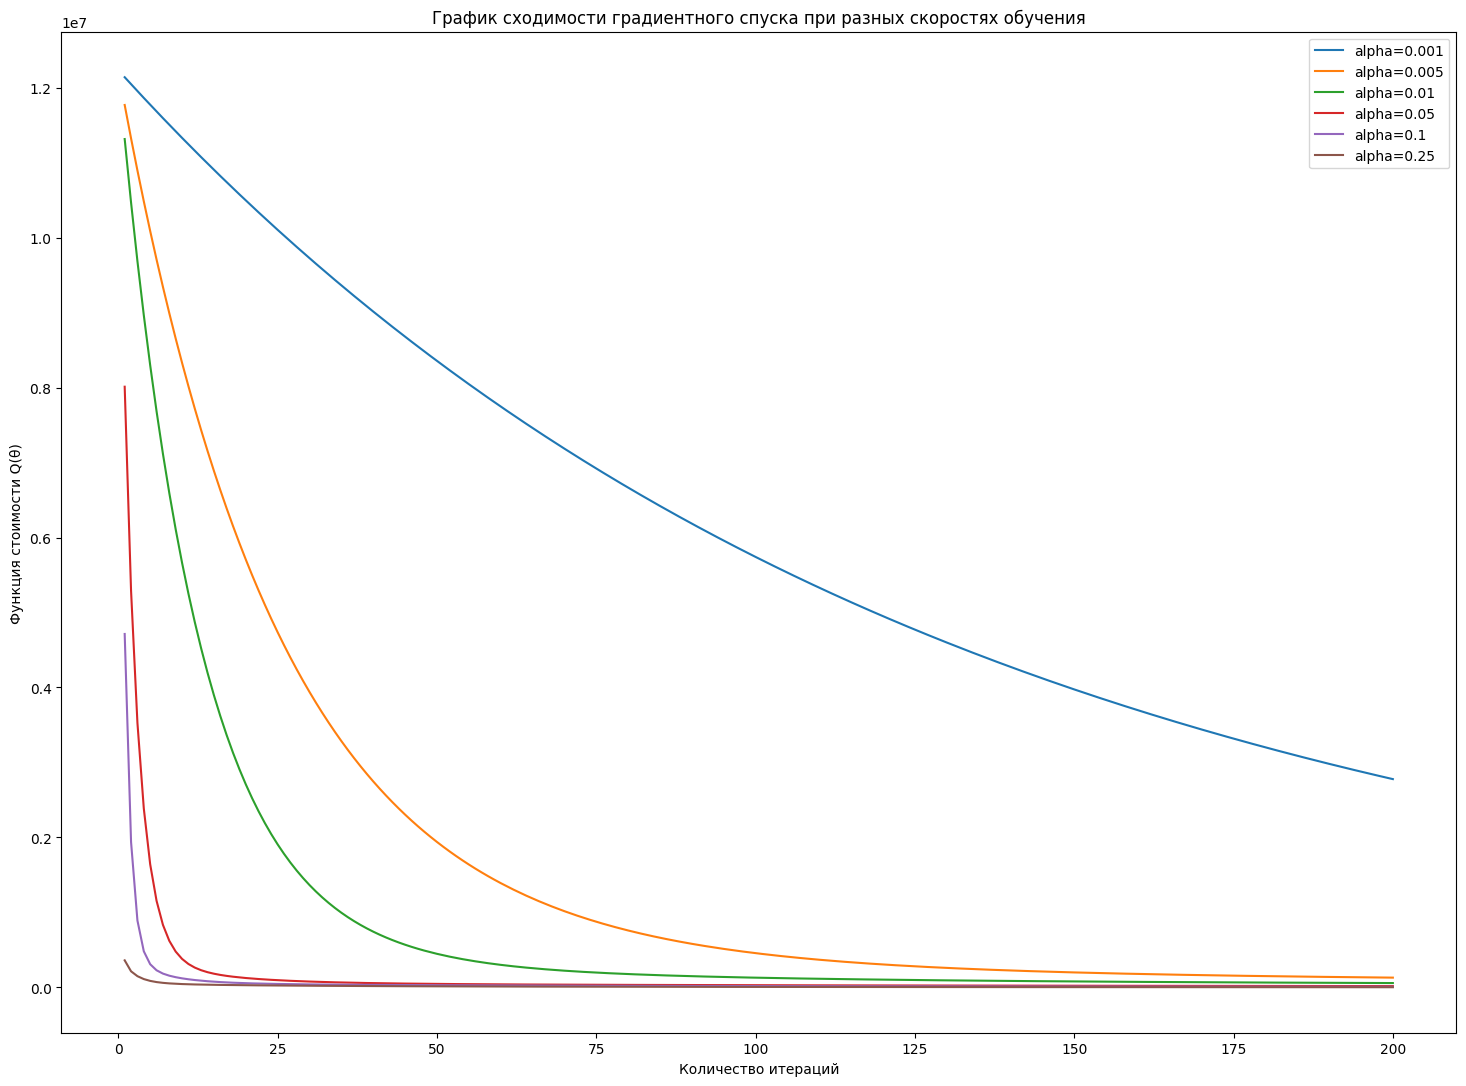

In [65]:
# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую
#

plt.figure(figsize=(18, 13))

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.25]  # Несколько значений alpha для сравнения
max_iters = 200  # Максимальное число итераций
iters = list(range(1, max_iters + 1))  # Итерации от 1 до max_iters

for alpha in learning_rates:
    my_model = LinearRegressionModel()
    my_model.alpha = alpha
    costs = []

    # Для каждого количества итераций обучаем модель и сохраняем значение функции стоимости
    for it in iters:
        cost = my_model.fit_with_GD(X_train_processed, y_train.values, iters=it)
        costs.append(cost)

    plt.plot(iters, costs, label=f'alpha={alpha}')

plt.xlabel('Количество итераций')
plt.ylabel('Функция стоимости Q(θ)')
plt.title('График сходимости градиентного спуска при разных скоростях обучения')
plt.legend()
plt.show()

*Здесь можно написать свои комментарии по поводу графика и выбора наиболее подходящей скорости обучения*

- - -
#### 6. Решить систему нормальных уравнений (метод наименьших квадратов) (0.5 балла)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует нормирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [58]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код
# Преобразование в numpy-массивы
if not isinstance(X_train_processed, np.ndarray):
    X_train_processed = X_train_processed.values if hasattr(X_train_processed, 'values') else np.array(X_train_processed)

if not isinstance(y_train.values, np.ndarray):
    y_train_np = y_train.values if hasattr(y_train, 'values') else np.array(y_train)
else:
    y_train_np = y_train.values

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train_processed, y_train_np)

print(cost)
print(my_normal_equations_model)
my_normal_equations_model = LinearRegressionModel()
##cost = my_normal_equations_model.fit_with_normal_equations(X_train, y_train)
#print(cost)
#print(my_normal_equations_model)

2.618873604752443e-22
Вектор параметров: [ 1.36428073e+03  6.32098818e-11 -6.04813977e-11 -9.09494702e-13
 -4.54747351e-13  6.99503910e+02  1.53174703e+03  3.41070183e+02
  3.41070183e+02  3.41070183e+02  3.41070183e+02  6.82140366e+02
  6.82140366e+02  1.13690061e+02  1.13690061e+02  1.13690061e+02
  1.13690061e+02  1.13690061e+02  1.13690061e+02  1.13690061e+02
  1.13690061e+02  1.13690061e+02  1.13690061e+02  1.13690061e+02
  1.13690061e+02  7.62392174e+02  6.01888558e+02  8.02518077e+01
  2.40755423e+02  2.40755423e+02  2.40755423e+02  2.40755423e+02
  2.40755423e+02  8.02518077e+01  7.62392174e+02  6.01888558e+02
  4.54760244e+02  4.54760244e+02  4.54760244e+02]


- - -
#### 7. Сравнить разные методы (1.5 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?

+2 дополнительных балла за добавление к сравнению еще трех методов: встроенной реализации метода наименьших квадратов ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), гребневой регрессии (метод регуляризации Тихонова, [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)) и регрессии ([`LASSO`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso

# Приводим целевые переменные к numpy-массивам
y_train_np = y_train.values if hasattr(y_train, 'values') else np.array(y_train)
y_test_np = y_test.values if hasattr(y_test, 'values') else np.array(y_test)

# 1) Градиентный спуск
my_model = LinearRegressionModel()
my_model.alpha = 0.25
my_model.fit_with_GD(X_train_processed, y_train_np, iters=1000)
y_pred_gd = my_model.predict(X_test_processed)
rmse_gd = np.sqrt(mean_squared_error(y_test_np, y_pred_gd))
print("Градиентный спуск RMSE:", rmse_gd)

# 2) Нормальные уравнения
my_normal_model = LinearRegressionModel()
my_normal_model.fit_with_normal_equations(X_train_processed, y_train_np)
y_pred_ne = my_normal_model.predict(X_test_processed)
rmse_ne = np.sqrt(mean_squared_error(y_test_np, y_pred_ne))
print("Нормальные уравнения RMSE:", rmse_ne)

# 3) Стохастический градиентный спуск (sklearn)
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_processed, y_train_np)
y_pred_sgd = sgd_model.predict(X_test_processed)
rmse_sgd = np.sqrt(mean_squared_error(y_test_np, y_pred_sgd))
print("SGDRegressor RMSE:", rmse_sgd)

# 4) Встроенный LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train_np)
y_pred_lr = lr_model.predict(X_test_processed)
rmse_lr = np.sqrt(mean_squared_error(y_test_np, y_pred_lr))
print("LinearRegression RMSE:", rmse_lr)

# 5) Ridge регрессия
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_processed, y_train_np)
y_pred_ridge = ridge_model.predict(X_test_processed)
rmse_ridge = np.sqrt(mean_squared_error(y_test_np, y_pred_ridge))
print("Ridge RMSE:", rmse_ridge)

# 6) Lasso регрессия
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_processed, y_train_np)
y_pred_lasso = lasso_model.predict(X_test_processed)
rmse_lasso = np.sqrt(mean_squared_error(y_test_np, y_pred_lasso))
print("Lasso RMSE:", rmse_lasso)

Градиентный спуск RMSE: 0.672528544199931
Нормальные уравнения RMSE: 2.3666069959836078e-11
SGDRegressor RMSE: 0.9276738627554476
LinearRegression RMSE: 3.3976392631152225e-12
Ridge RMSE: 7.327230232052393
Lasso RMSE: 0.11544162843575544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


####Выводы касательно эффективности методов
На заданном датасете наиболее производительным методом является решение системы нормальных уравнений и встроенный метод LinearRegression, которые показывают практически нулевое значение RMSE (порядка 10^-11), что свидетельствует о точном аналитическом решении задачи линейной регрессии. Метод градиентного спуска, реализованный вручную, также демонстрирует хорошее качество с RMSE около 0.67, что является приемлемым результатом и говорит о том, что алгоритм сходится и успешно обучается. Встроенный SGDRegressor показывает чуть более высокий RMSE (~0.93), что можно объяснить стохастическим характером алгоритма и необходимостью дополнительной настройки параметров (например, увеличения числа итераций). Методы регуляризации Ridge и Lasso демонстрируют разные результаты: Ridge с RMSE около 7.3 показывает среднее качество, возможно из-за неподобранного параметра регуляризации, тогда как Lasso с RMSE около 0.11 показывает хороший результат, что свидетельствует о полезности L1-регуляризации для отбора значимых признаков и борьбы с переобучением.

Ошибки моделей оцениваются как приемлемые для градиентного спуска и Lasso, практически идеальные для нормальных уравнений и LinearRegression, средние для Ridge и немного хуже для SGDRegressor. В целом, результаты подтверждают теоретические ожидания: аналитические методы дают точные решения, а численные методы требуют настройки гиперпараметров и нормализации данных для достижения сопоставимого качества. Регуляризационные методы полезны для повышения обобщающей способности модели, особенно при наличии большого числа признаков или мультиколлинеарности.

Таким образом, для данного датасета предпочтительнее использовать нормальные уравнения или LinearRegression для точности и эффективности, а градиентный спуск и Lasso - как альтернативы с возможностью контроля переобучения. SGDRegressor требует дополнительной настройки, а Ridge - подбора параметров регуляризации.

- - -
#### 8. Опишите полученные результаты (0.5 балла)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

# Вывод по методам прогнозирования целевой переменной

## Как мы можем эффектно и эффективно представить решение?

Мы использовали несколько подходов к прогнозированию, включая точные аналитические методы и современные алгоритмы машинного обучения, что позволило получить надёжные и точные прогнозы спроса на аренду велосипедов. Такое решение можно представить в виде наглядных метрик качества и графиков, подчёркивающих высокую точность и стабильность модели, что важно для принятия управленческих решений.

## Что мы узнали о проблеме?

Данные имеют линейную структуру, что подтверждается практически идеальными результатами аналитических методов. Численные методы, такие как градиентный спуск и стохастический градиентный спуск, при правильной настройке также показывают хорошие результаты. Регуляризация помогает улучшить модель, снижая переобучение и выделяя ключевые признаки.

## Как можно улучшить решение?

Для повышения качества прогноза стоит автоматизировать подбор параметров моделей, расширить набор признаков, а также рассмотреть более сложные модели и ансамбли. Важно внедрить систему мониторинга и обновления модели, чтобы поддерживать актуальность и точность прогнозов в изменяющихся условиях.


- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.

###Градиентный спуск
* Дано: функционал качества $Q(\theta)$.
* Найти: вектор параметров $\theta$, при котором $Q(\theta)$ → min.
Пример: $\min\limits_{\theta_{0},\theta_{1}} Q(\theta_{0},\theta_{1})$, $\theta = \left\{\theta_{0}, \theta_{1}\right\}$
* Алгоритм:  
1. Задаем начальное значение для вектора $\theta$(инициализируем веса)  
Пример: $\theta_0 = \theta_1 = 0$
2. Пошагово изменяем значения элементов вектора $\theta$, чтобы уменьшить
$Q(\theta)$, до тех пор, пока не достигнем (окажемся вблизи) минимума.  
Пример:  
$\theta_{0}^{след.}=\theta_{0}^{пред.}-\alpha\frac{d}{d\theta_0}Q(\theta_{0}^{пред.},\theta_{1}^{пред.})$,  
 $\theta_{1}^{след.}=\theta_{1}^{пред.}-\alpha\frac{d}{d\theta_1}Q(\theta_{0}^{пред.},\theta_{1}^{пред.})$  
   
     

####Алгоритм градиентного спуска  
Повторять:  
$\theta_{j}^{след.}:=\theta_{j}^{пред.}-\alpha\frac{d}{d\theta_j}Q(\theta_{0}^{пред.},\theta_{1}^{пред.}, ... , \theta_{n}^{пред.})$  
... до тех пор, пока не выполнится $|\theta_{j}^{след.} - \theta_{j}^{пред.}|<\delta_{\theta}$ для всех $j$, либо $|Q(\theta_{0}^{пред.}, ... , \theta_{n}^{пред.})-Q(\theta_{0}^{след.}, ... , \theta_{n}^{след.})|<\delta_{Q}$  
Важно: обновлять $\theta_{j}$ необходимо одновременно для всех $j$  
$\alpha$ - скорость обучения (learning rate):
* Если $\alpha$ слишком мало, требуется большое количество итераций для сходимости
* Если $\alpha$ слишком велико, значение функции потерь может не уменьшаться на каждой итерации и алгоритм может не сойтись к устойчивому минимуму  
  
####Градиентный спуск и линейная регрессия с одной переменной  
* Найдем частные производные функционала качества:  
$\frac{d}{d\theta_0}Q(\theta_{0},\theta_{1})=\frac{d}{d\theta_0}\frac{1}{2l}\sum_{i=1}^{l} (g(x_i,\theta_0,\theta_1)-y_i)^2=\frac{d}{d\theta_0}\frac{1}{2l}\sum_{i=1}^{l} (\theta_1 x_i +\theta_0 - y_i)^2 = \frac{1}{l}\sum_{i=1}^{l} (\theta_1 x_i +\theta_0 - y_i)$  
* Итоговая формула для градиентного спуска  
$$\theta_0 := \theta_0 - \alpha \frac{d}{d\theta_0}Q(\theta_0,\theta_1) = \theta_0 - \alpha \frac{1}{l}\sum_{i=1}^{l} (g(x_i,\theta_0,\theta_1)-y_i)$$  
$$\theta_1 := \theta_1 - \alpha \frac{d}{d\theta_1}Q(\theta_0,\theta_1) = \theta_1 - \alpha \frac{1}{l}\sum_{i=1}^{l} (g(x_i,\theta_0,\theta_1)-y_i)x_i$$  
####Градиентный спуск и многомерная линейная регрессия  
Повторять,	пока	алгоритм	не	сойдется:	{
$$\theta_0 : = \theta_0 - \alpha \frac{1}{l}\sum_{i=1}^{l} (g(x_i,\theta)-y_i)\cdot x_{i,0}$$
$$\theta_1 : = \theta_1 - \alpha \frac{1}{l}\sum_{i=1}^{l} (g(x_i,\theta)-y_i)\cdot x_{i,1}$$
$$\theta_2 : = \theta_2 - \alpha \frac{1}{l}\sum_{i=1}^{l} (g(x_i,\theta)-y_i)\cdot x_{i,2}$$  
}  
$x_i$ - i-ый объект (вектор) из обучающей выборки, $i = 1..l$  
$x_{i,j}$ - j-ый элемент вектора $x_i$, $j = 0..n, x_{i,0} = 1$ при $\forall i$  
$\theta$ - вектор параметров, $\theta = \left\{\theta_{0}, \theta_{1}, ...,\theta_{n}\right\}$  
  
  
Повторять, пока алгоритм	не	сойдется:	{
  $$\theta_j : = \theta_j - \alpha \frac{1}{l}\sum_{i=1}^{l} (g(x_i,\theta)-y_i)\cdot x_{i,j}$$, для $j = 0..n$  

}
####Векторизация
* Регрессионная модель:
$g(x_i,\theta)=\theta_0 + \sum_{j=1}^{n}\theta_jx_{i,j}=\sum_{j=0}^{n}\theta_jx{i,j}$  
где $x_i$-вектор признаков i-го объекта, $\theta$ - вектор параметров, $x_{i,j}=1$ - фиктивный признак.  

```python
for j in range (0,n)
g = g + theta[j]*x[j]
```
В векторном виде:
$$g(x_i,\theta)=\theta \cdot x_i$$
```python
import numpy as np
g = np.dot(theta, x)
```
#### Линейная регрессия с одной переменной
* Модель:  
$g(x, \theta)=\theta_1x + \theta_0, \tilde{y} = kx + b$
* Пусть $k = \theta_1, b=\theta_0 = \theta = 0$
* Тогда эмпирический риск:
$$Q(\theta, X^l)= \frac{1}{2l}\sum_{j=1}^{l}(\tilde{y}-y_i)^2=\frac{1}{2l}\sum_{j=1}^{l}(kx-y_i)^2$$
#### Пример функционала качества (эмпирический риск)  
* Модель:  
$$g(x,\theta)=\theta_1x + \theta_0, \tilde{y} = kx+b$$  
*  Пусть $k=\theta_1, b=\theta_0 \neq 0$  
* Тогда эмпирический риск:
$$Q(\theta, X^l)=\frac{1}{2l}\sum_{j=1}^{l}(\tilde{y}-y_i)^2=\frac{1}{2l}\sum_{j=1}^{l}(kx+b-y_i)^2$$

In [ ]:

class LinearRegressionModel:
    def __init__(self):
        """
        Инициализация модели
        """
        self.theta = None  # вектор параметров модели
        self.alpha = 0.01  # скорость обучения
        self.cost = None   # значение функции стоимости (эмпирический риск)

    def compute_cost(self, X, y, theta):
        """
        Вычисление функции стоимости (эмпирический риск)
        Q(θ) = (1/(2l)) * sum((Xθ - y)^2)
        """
        l = len(y)
        predictions = X.dot(theta)             # g(x_i, θ)
        errors = predictions - y
        cost = (1/(2*l)) * np.dot(errors.T, errors)
        return cost

    def gradient_descent(self, X, y, theta, alpha, iters, tol_theta=1e-8, tol_cost=1e-10):
        """
        Градиентный спуск с обновлением всех параметров одновременно
        по формуле из лекции:
        θ_j := θ_j - α * (1/l) * sum_i (g(x_i, θ) - y_i) * x_{i,j}
        """
        l = len(y)
        cost_prev = self.compute_cost(X, y, theta)

        for iteration in range(iters):
            predictions = X.dot(theta)           # g(x_i, θ)
            errors = predictions - y             # (g - y)
            gradient = (1/l) * X.T.dot(errors)  # вектор градиента для всех θ_j

            theta_next = theta - alpha * gradient

            cost_next = self.compute_cost(X, y, theta_next)

            # Проверка сходимости: изменения параметров и стоимости малы
            if np.all(np.abs(theta_next - theta) < tol_theta) and abs(cost_prev - cost_next) < tol_cost:
                theta = theta_next
                self.cost = cost_next
                print(f"Сходимость достигнута на итерации {iteration+1}")
                break

            theta = theta_next
            cost_prev = cost_next

        self.cost = cost_prev
        return theta, self.cost

    def fit_with_GD(self, X_train, y_train, iters=1000):
        """
        Обучение модели методом градиентного спуска.
        Добавляем столбец x0=1 (фиктивный признак).
        """
        l, n = X_train.shape
        X_b = np.hstack([np.ones((l, 1)), X_train])  # добавляем x0=1

        self.theta = np.zeros(n + 1)  # инициализация θ нулями

        self.theta, self.cost = self.gradient_descent(X_b, y_train, self.theta, self.alpha, iters)
        return self.cost

    def predict(self, X_test):
        """
        Предсказание значений.
        Добавляем фиктивный признак x0=1.
        """
        l = X_test.shape[0]
        X_b = np.hstack([np.ones((l, 1)), X_test])
        y_pred = X_b.dot(self.theta)
        return y_pred

    def __str__(self):
        return f"Вектор параметров (theta): {self.theta}\nФункция стоимости: {self.cost}"